In [1]:
import music21
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import mnet


## Load Data

In [2]:
'''
Creat local corpus with access pieces
'''

localCorpus = music21.corpus.corpora.LocalCorpus()
localCorpus.addPath('../library')
music21.corpus.cacheMetadata()


/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: local metadata cache: starting processing of paths: 1
/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/j6/2q7hftds7vb8_lsfy50l8lzw0000gn/T/music21/local.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1589089790.1898878
bundles.py: WARNING: Skipped 1 sources already in cache.
/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: writing time: 0.018 md items: 6

/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/j6/2q7hftds7vb8_lsfy50l8lzw0000gn/T/music21/local.p.gz
caching.py: WARNING: cache: final writing time: 0.019 seconds


## Grouped Roman Numeral

In [3]:
s = music21.corpus.parse('telemannfantasie1.xml')
chord_lst = s.flat.chordify().recurse().notes
offsets=[0.0, 16.0, 40.0, 104.0, 144.0, 162.0, 180.0, 201.0, "end"]
nodelst_group, transition_edges=mnet.convert_grouped_rn(chord_lst, offsets, "A")
g_group=mnet.create_graph(nodelst_group)


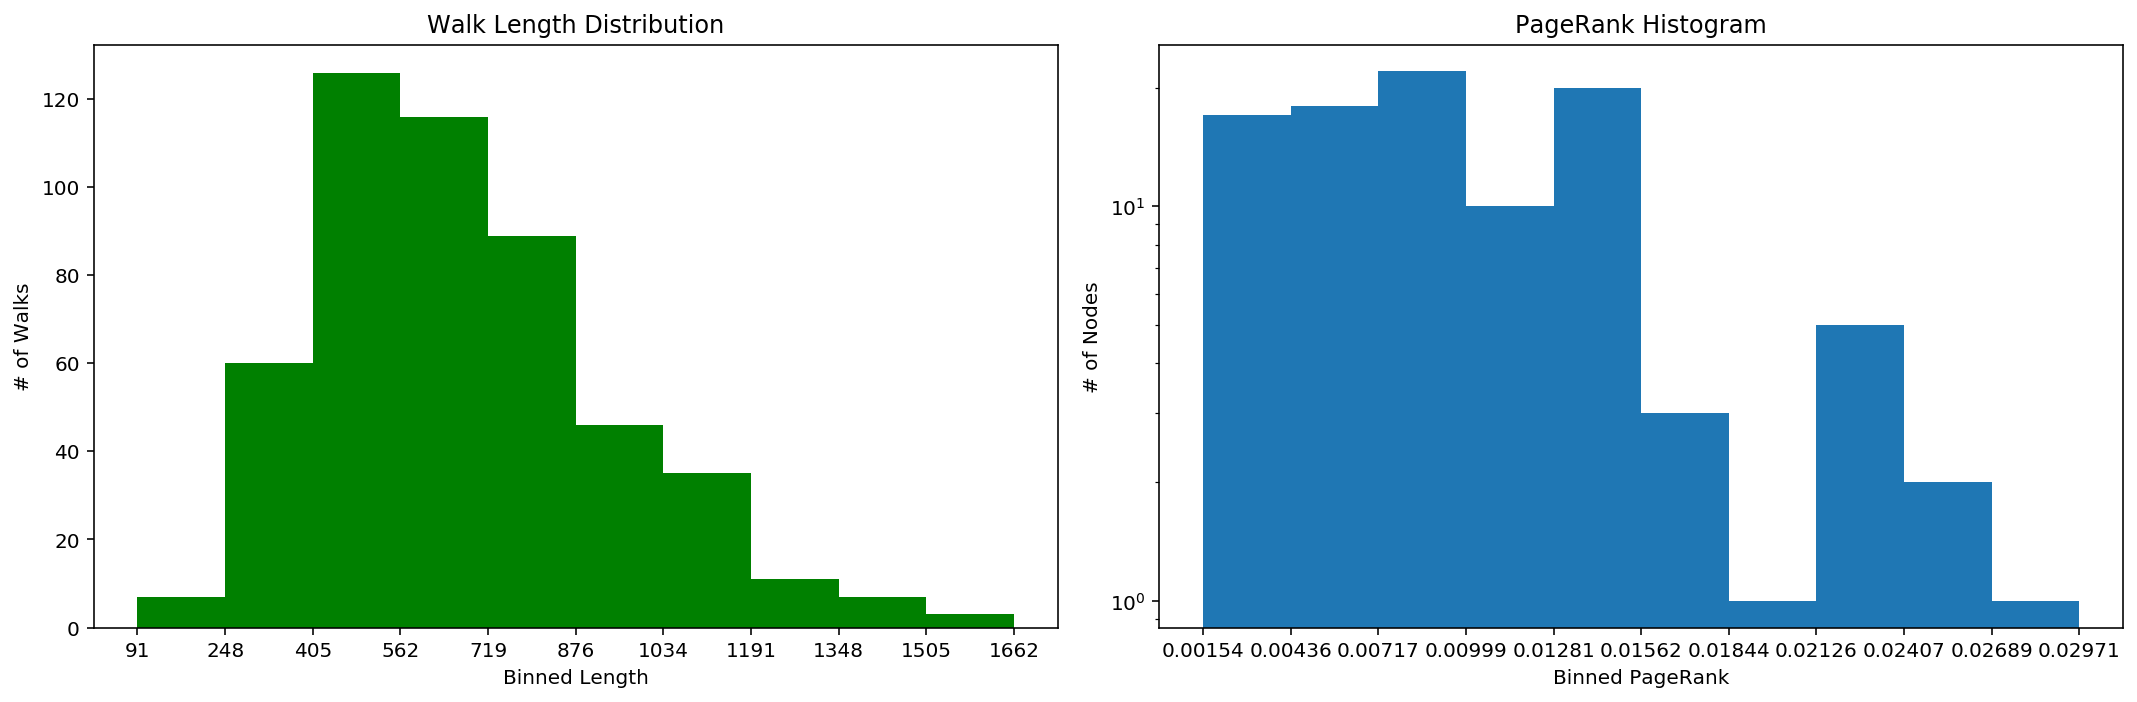

In [43]:
gen_standard_plot(g_group, filepath = '../figures/tel_group_rn.pdf', iterations=500)

## Roman Numeral 

In [5]:

s = music21.corpus.parse('telemannfantasie1.xml')
chord_lst = list(s.chordify().recurse().notes)
nodelst = mnet.convert_chord_note(chord_lst, 'A')
g_rn=mnet.create_graph(nodelst)

#write as .gexf
#nx.write_gexf(g_rn, "rn_composition_notechord.gexf")


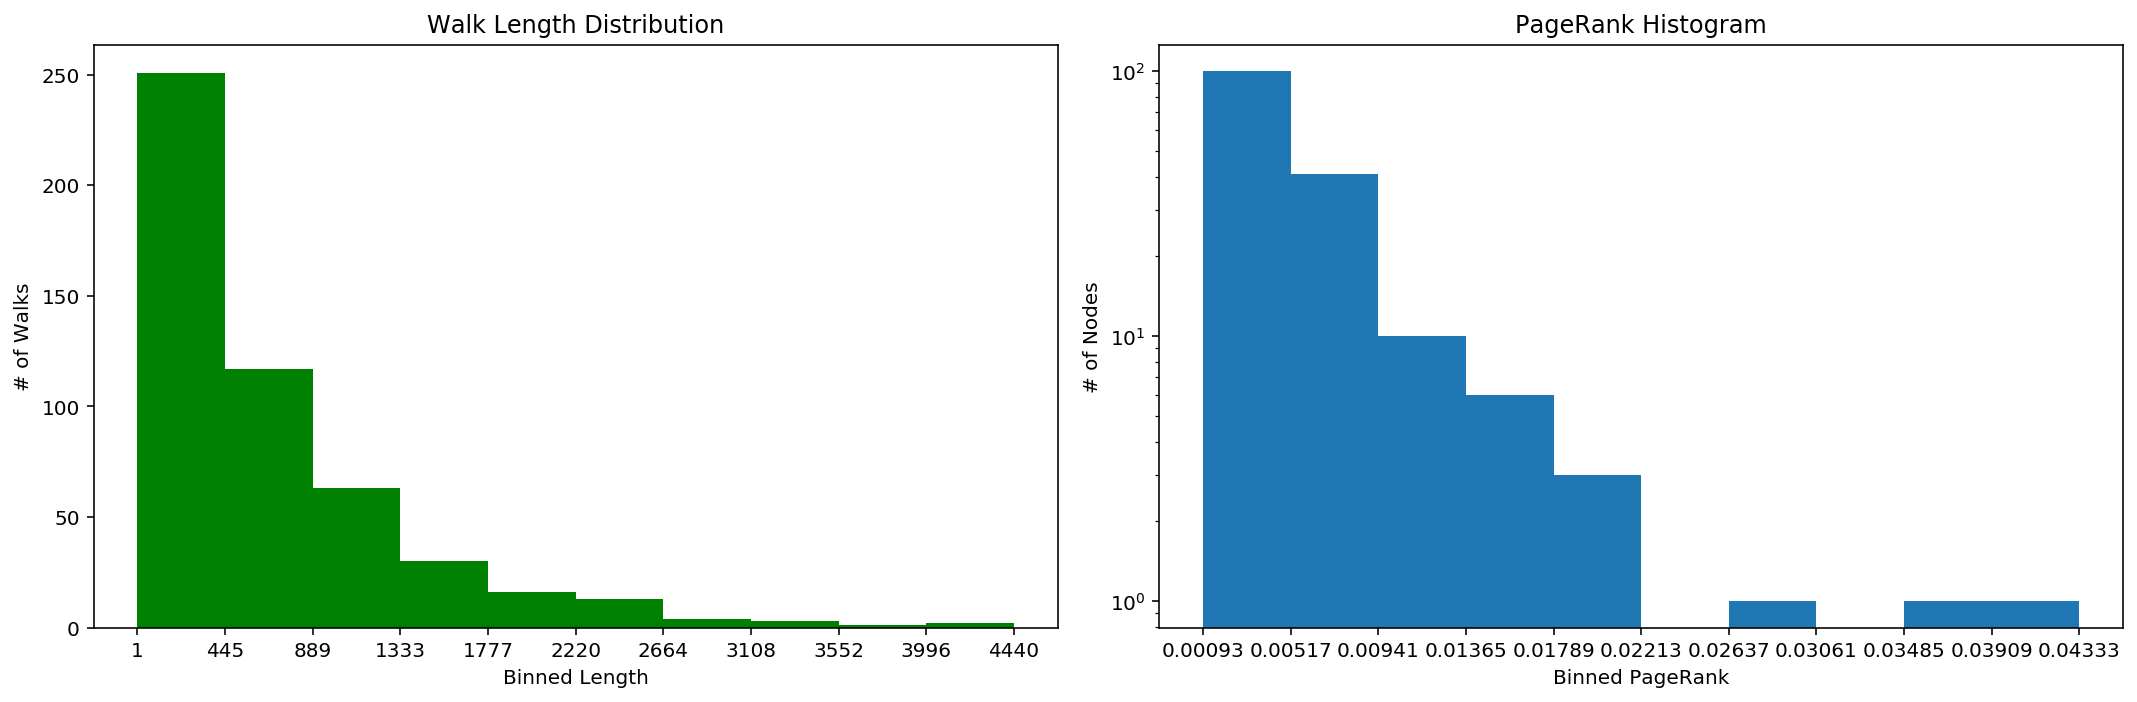

In [42]:
gen_standard_plot(g_rn, filepath = '../figures/tel_rn.pdf', iterations=500)

## Grouped

In [7]:
flute = s[5]
flute_notes =flute.recurse().notes
grouping = [1, 5, 11, 27, 37, 49, 61, 75, "end"]


nodelst_group, transition_edges=mnet.convert_grouping(flute_notes, grouping)
g_group=mnet.create_graph(nodelst_group)


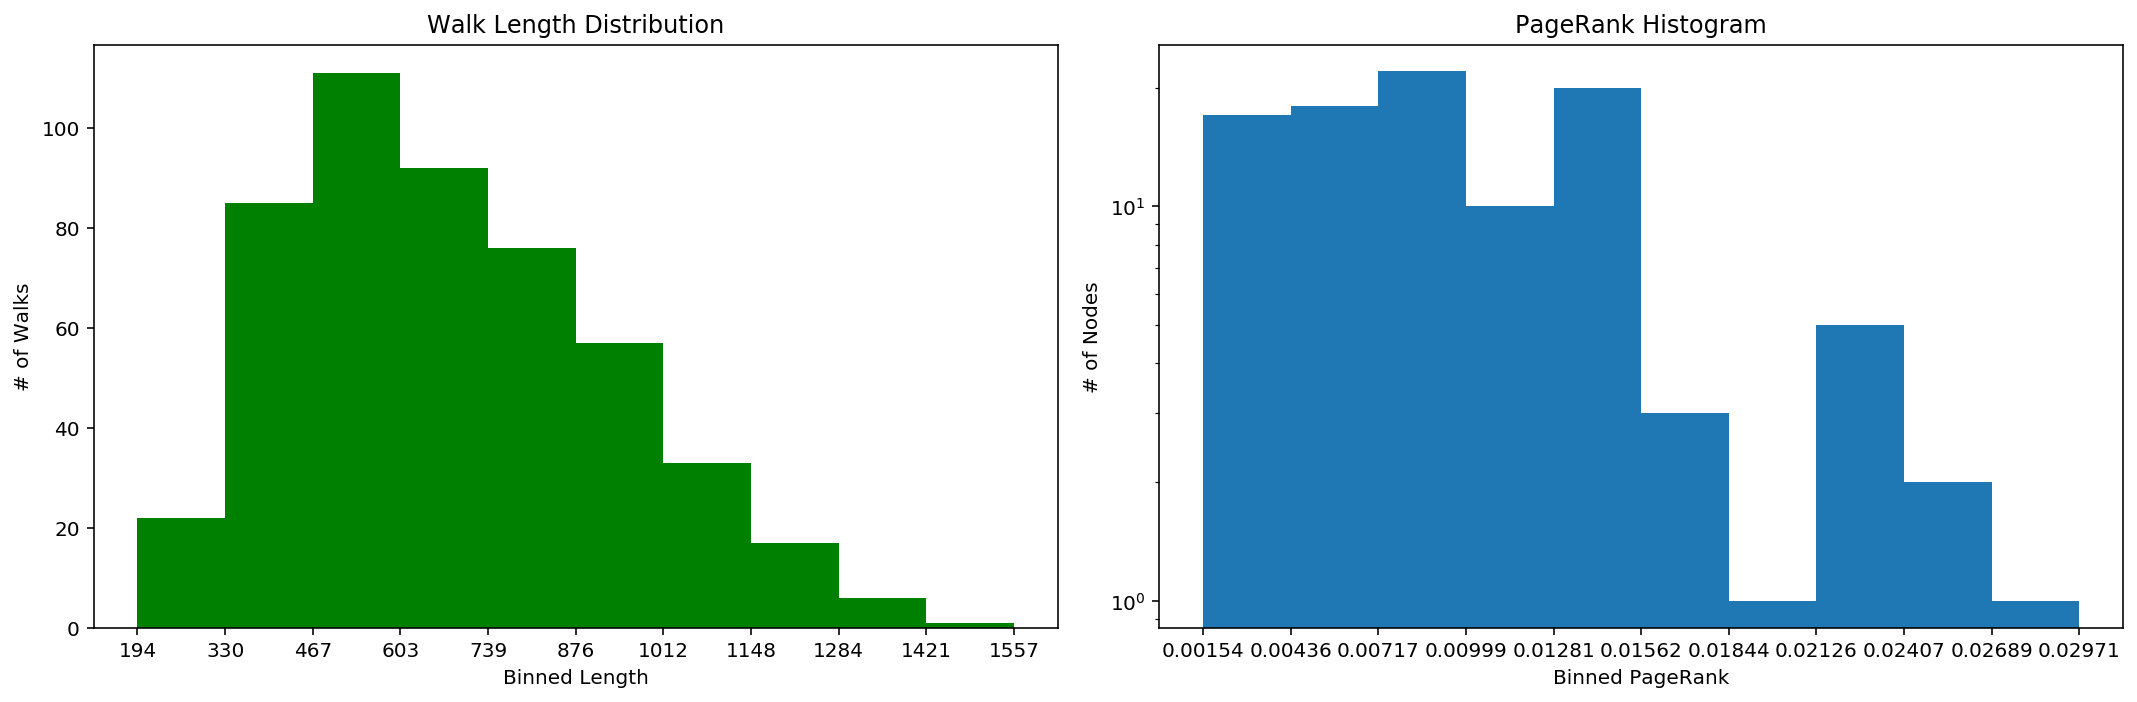

In [41]:
gen_standard_plot(g_group, filepath = '../figures/tel_grouped.pdf', iterations=500)

## Basic

In [9]:
flute_notes =flute.recurse().notes
notelst = list(flute_notes)
nodelst_basic=mnet.convert_basic(notelst)
g_basic=mnet.create_graph(nodelst_basic)

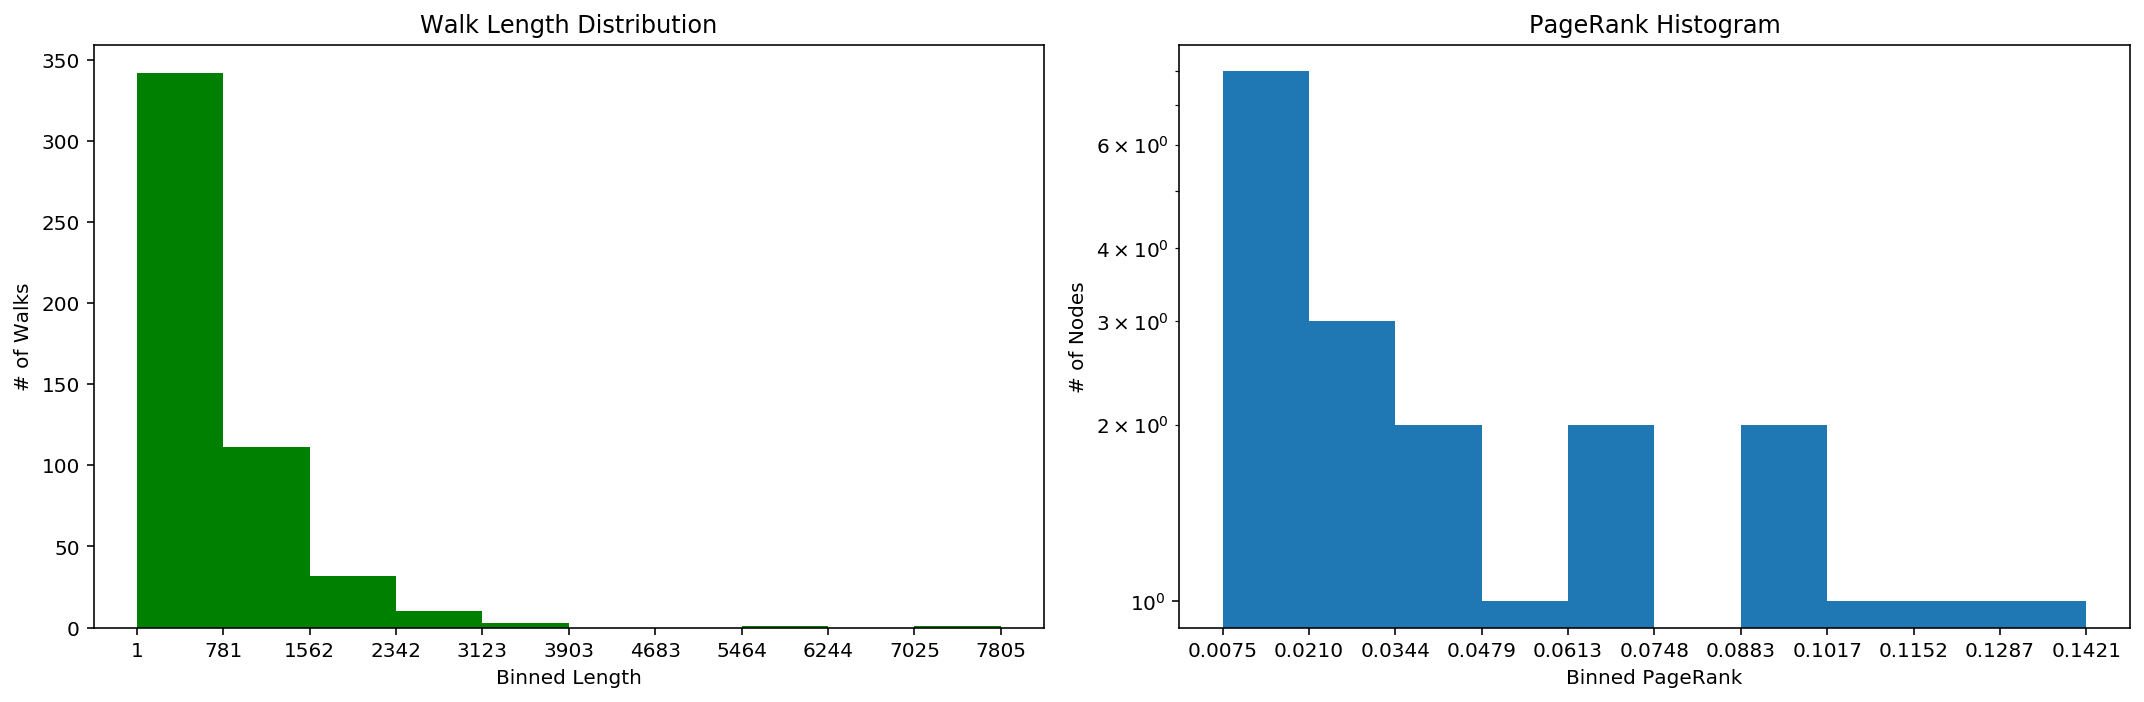

In [40]:
gen_standard_plot(g_basic, filepath = '../figures/tel_basic.pdf', iterations=500)

In [48]:

def gen_cdf(g_rn, iterations=100):

    length_arr = mnet.get_Lengths(g_rn, iterations)
    


    count, bins, _=plt.hist(length_arr)
    print(count)
    print(bins)
    y = np.arange(len(count))
    i=0
    while i < len(count):
        y[i]=np.sum(count[i: len(count)-1])
        i += 1
    
    return bins, y
    
    #ax0.hist(length_arr, color='g')
    #ax.set_yscale('log')
    #ax0.set_xlabel("Binned Length")
    #ax0.set_ylabel("# of Walks")
    #ax0.set_title("Walk Length Distribution")

    

[250. 142.  48.  32.  12.   3.   2.   5.   3.   3.]
[1.000e+00 4.600e+02 9.190e+02 1.378e+03 1.837e+03 2.296e+03 2.755e+03
 3.214e+03 3.673e+03 4.132e+03 4.591e+03]


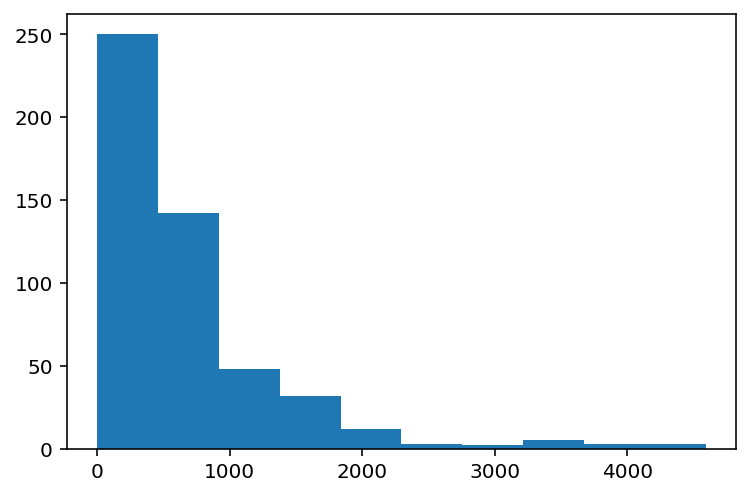

In [55]:
x, y = gen_cdf(g_basic, iterations=500)

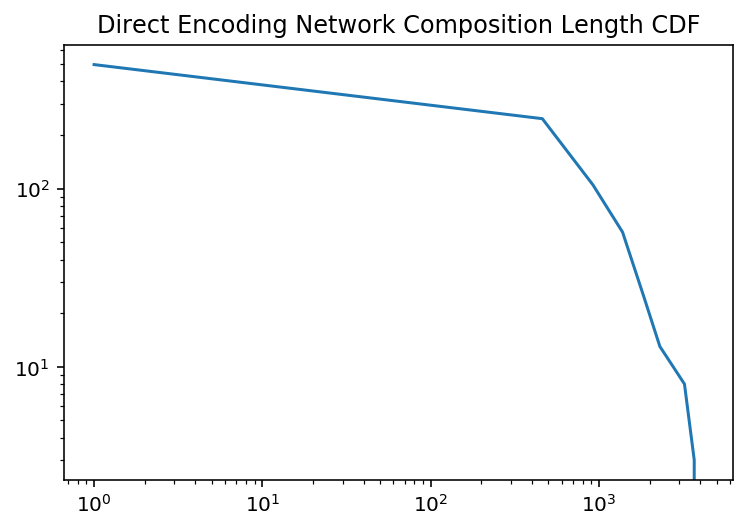

In [60]:
plt.title("Direct Encoding Network Composition Length CDF")
plt.plot(x[0:-1],y)
plt.yscale('log')
plt.xscale('log')

[1.82e+03 7.20e+02 2.70e+02 1.18e+02 5.00e+01 9.00e+00 8.00e+00 3.00e+00
 1.00e+00 1.00e+00]
[1.0000e+00 6.6370e+02 1.3264e+03 1.9891e+03 2.6518e+03 3.3145e+03
 3.9772e+03 4.6399e+03 5.3026e+03 5.9653e+03 6.6280e+03]


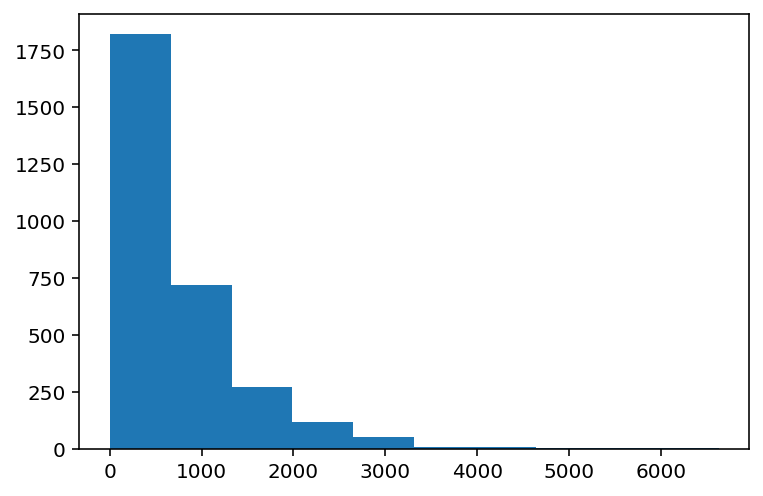

In [68]:
x_rn, y_rn = gen_cdf(g_rn, iterations=3000)

[1.826e+03 6.760e+02 2.910e+02 1.400e+02 3.400e+01 2.500e+01 4.000e+00
 2.000e+00 1.000e+00 1.000e+00]
[1.0000e+00 6.5060e+02 1.3002e+03 1.9498e+03 2.5994e+03 3.2490e+03
 3.8986e+03 4.5482e+03 5.1978e+03 5.8474e+03 6.4970e+03]


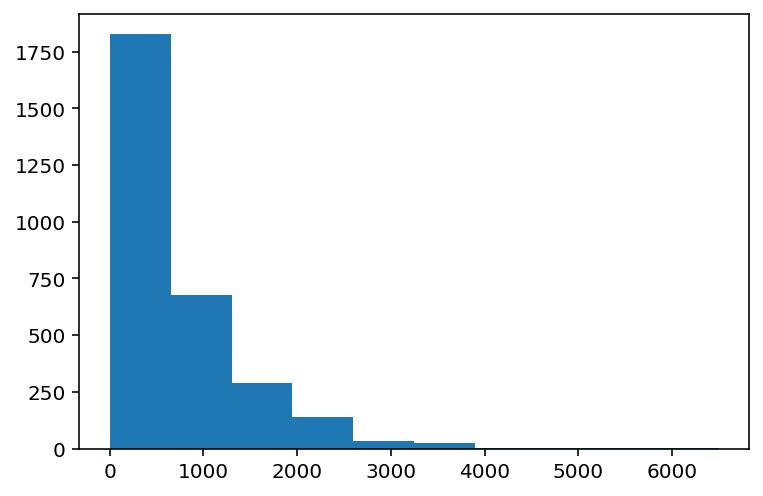

In [66]:
x_rn, cumsum_rn = gen_cdf(g_rn, iterations=3000)

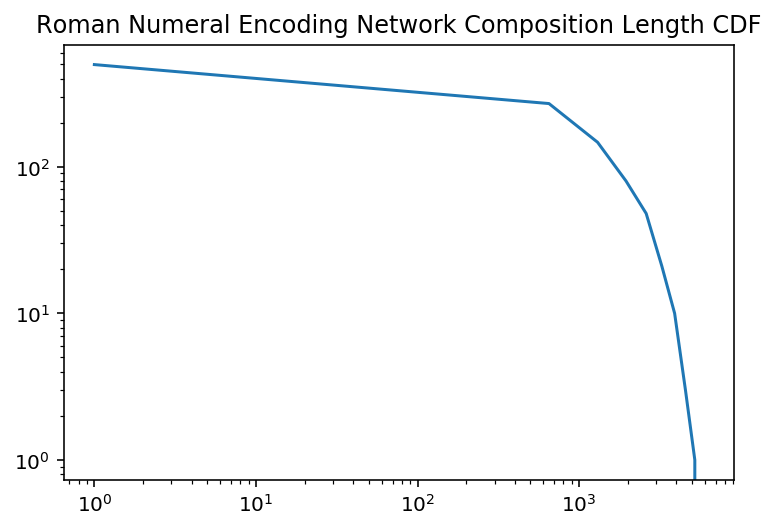

In [67]:
plt.title("Roman Numeral Encoding Network Composition Length CDF")
plt.plot(x_rn[0:-1],y_rn)
plt.yscale('log')
plt.xscale('log')

In [38]:
def gen_standard_plot(g_rn, filepath, iterations=100):
    fig = plt.figure(figsize=(15,5) )   
    ax0 = plt.subplot2grid((1,2), (0,0))
    
    

    length_arr = mnet.get_Lengths(g_rn, iterations)
    counts0, bin_edges0, _ = ax0.hist(length_arr, color='g')
    ax0.set_xticks(bin_edges0)
    #ax.set_yscale('log')
    ax0.set_xlabel("Binned Length")
    ax0.set_ylabel("# of Walks")
    ax0.set_title("Walk Length Distribution")

    
    pagerankplot0 = mnet.pagerank_analysis(g_rn)
    ax1 = plt.subplot2grid((1,2), (0,1))
    counts1, bin_edges1, _ = ax1.hist(pagerankplot0[1])
    ax1.set_yscale('log')
    ax1.set_xticks(bin_edges1)
    ax1.set_xlabel("Binned PageRank")
    ax1.set_ylabel("# of Nodes")
    ax1.set_title("PageRank Histogram")
    #ax.plot(bins_center, hist, lw=2)
    #ax.set_ylim([0, 400000])
    plt.tight_layout()
    plt.savefig(filepath)
    plt.show()    

    
   
